In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import datetime as dt
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
from arch import arch_model

In [2]:
filename='E:\Data\DataLab2.csv'
table = pd.read_csv(filename)
table.head()
table['Date'] = pd.to_datetime(table['Date'])
table = table.set_index('Date')
start = dt.datetime(2006, 12, 26)
end = dt.datetime(2008,12,31)
our_sample = table[start:end]
our_sample['losses'] = our_sample['PL']*-1
backtesting07_sample = our_sample[dt.datetime(2007,1,1):dt.datetime(2007,12,31)]
backtesting08_sample = our_sample[dt.datetime(2008,1,2):dt.datetime(2008,12,31)]

In [3]:
violations_bhs = backtesting07_sample['losses']>backtesting07_sample['VaRBHS']

In [4]:
backtesting07_sample.insert(6,"violations_bhs",violations_bhs.astype(int))
print(backtesting07_sample)

              PL  VaRBHS      VaREWMA         VaRn         VaRt       VaRPot  \
Date                                                                           
2007-01-01    30  1115.0  1053.756229   777.645897   990.797723  1391.726372   
2007-01-03   200  1115.0  1021.701152   777.393080   993.867845  1391.726372   
2007-01-04  -110  1115.0   990.624063   777.083717   994.978159  1391.726372   
2007-01-06    50  1115.0   966.503238   777.332311   993.984109  1391.726372   
2007-01-07   160  1115.0   943.122243   775.856105   996.059063  1391.726372   
...          ...     ...          ...          ...          ...          ...   
2007-12-25  -550  2720.0  5446.739118  1850.330910  1872.782072  3923.705072   
2007-12-27  -790  2720.0  5281.329790  1851.518976  1880.739916  3923.705072   
2007-12-28  3710  2720.0  5140.982010  1854.690014  1898.367178  3923.705072   
2007-12-30   840  2720.0  5025.876542  1891.472008  1899.165832  3923.705072   
2007-12-31   650  2720.0  5636.548968  1

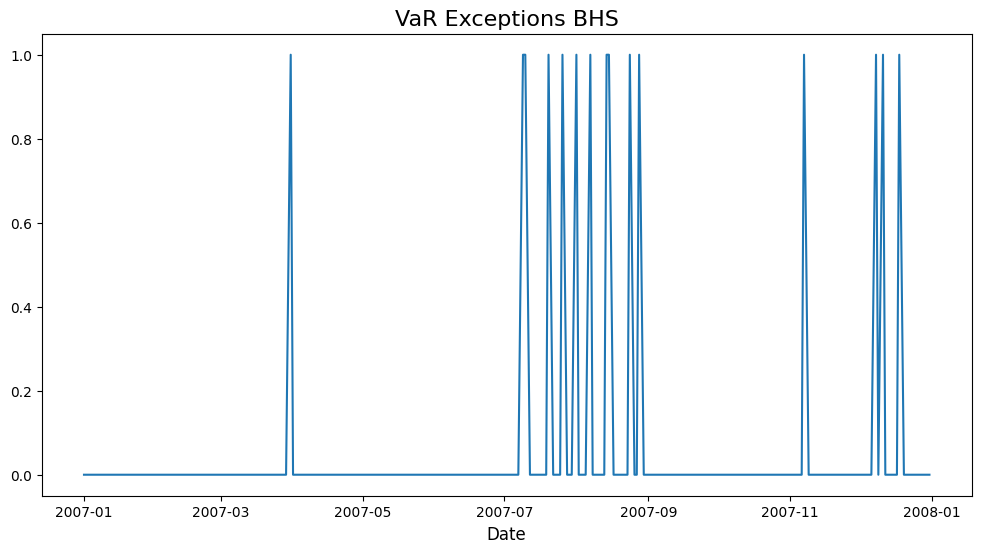

In [5]:
fig,ax=plt.subplots()
ax.plot(backtesting07_sample['violations_bhs'],label='Exceptions')
plt.xlabel('Date',fontsize=12)
plt.title('VaR Exceptions BHS',fontsize=16)
fig.set_size_inches(12, 6)

In [7]:
n_violations = sum(backtesting07_sample['violations_bhs'])
n_expectd = 0.01*len(backtesting07_sample)
print("Number of VaR exceptions: {}. Expected number is {:.2f}.".format(n_violations,n_expectd))

Number of VaR exceptions: 15. Expected number is 2.52.


In [11]:
pValBHSKupiec = 1-stats.binom.cdf(n_violations-1,252,0.01)

In [12]:
print("P-value for rejecting that the model produces the correct number of violations vs alternative of underestimating VaR is {:.4f} ".format(pValBHSKupiec))

P-value for rejecting that the model produces the correct number of violations vs alternative of underestimating VaR is 0.0000 


In [13]:
n1BHS07 = sum(backtesting07_sample['violations_bhs'])
n0BHS07 = len(backtesting07_sample) - n1BHS07

In [14]:
n11BHS07 = 0
n00BHS07 = 0
n01BHS07 = 0
n10BHS07 = 0

In [17]:
for r in range(0,len(backtesting07_sample)-1):
    if backtesting07_sample['violations_bhs'][r]==1 and backtesting07_sample['violations_bhs'][r+1]==1:
        n11BHS07 += 1
    if backtesting07_sample['violations_bhs'][r]==0 and backtesting07_sample['violations_bhs'][r+1]==0:
        n00BHS07 += 1
    if backtesting07_sample['violations_bhs'][r]==0 and backtesting07_sample['violations_bhs'][r+1]==1:
        n01BHS07 += 1
    if backtesting07_sample['violations_bhs'][r]==1 and backtesting07_sample['violations_bhs'][r+1]==0:    
        n10BHS07 += 1
pi00BHS07 = n00BHS07 / (n00BHS07+n01BHS07) 
pi01BHS07 = n01BHS07 / (n00BHS07+n01BHS07)
pi10BHS07 = n01BHS07 / (n10BHS07+n11BHS07)
pi11BHS07 = n11BHS07 / (n10BHS07+n11BHS07)
pi0BHS07 = n0BHS07 / (n1BHS07+n0BHS07)
pi1BHS07 = n1BHS07 / (n1BHS07+n0BHS07)
print("Check one: {:.3f}".format(pi00BHS07+pi01BHS07))
print("Check two: {:.3f}".format(pi10BHS07+pi11BHS07)) 

Check one: 1.000
Check two: 1.000


In [20]:
lnNull07 = np.log(pi0BHS07**n0BHS07*pi1BHS07**n1BHS07) # Slide 9 VL 9, second equation 
lnAlt07 = np.log(pi00BHS07**n00BHS07*pi01BHS07**n01BHS07*pi10BHS07**n10BHS07*pi11BHS07**n11BHS07)
LRindBHS07 = -2*(lnNull07-lnAlt07)
print("The LR_ind test statistic is {:.4f}".format(-2*(lnNull07-lnAlt07)))
pValBHS07 = 1-stats.chi2.cdf(LRindBHS07,1) 
print("We get a p-value of {:.4f}."\
      .format(pValBHS07))

The LR_ind test statistic is -223.5344
We get a p-value of 1.0000.
